In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import random
import functools
import pandas as pd
from numpy import negative

random.seed(a=12)

# Sigmoid Implememtation
Activation Function: $$\frac{1}{1 + e^{-x}}$$

In [2]:
class Node:
    def __init__(self, id, type, parents, weights, neuralNetwork):
        self.id = id
        self.type = type
        self.parents = parents
        self.weights = weights
        self.inputs = {}
        self.output = 0
        self.children = []
        self.neuralNetwork = neuralNetwork
        # print(f"{self.type} node {self.id} created with weights {self.weights}.")
    def setValue(self, setterID, value):
        self.inputs[setterID] = value
        if len(self.inputs) == len(self.weights):
            self.ActivationFunction()

    def AddChildren(self, children):
        self.children = children
        # for child in children:
            # print(f"{child.id} added as child of {self.id}.")
        if self.type == "Hidden" or self.type == "Input":
            if len(children) == 0:
                raise f"{self.type} node added 0 children."

    def ActivationFunction(self):
        # print(f"Activation Function called on {self.id}")
        phi = 0
        if self.type == "Input":
            self.result = self.inputs["neuralNetwork"]
        else:
            if len(self.parents) != len(self.weights):
                raise f"Weights, parents mismatch: weights = {self.weights}, parents: {self.parents}"
            for parent in self.parents:
                phi += self.weights[parent.id] * self.inputs[parent.id]                     # \sum w_i * x_i
            phi += 1
            phi *= -1                                                                        # fixed bias 1
            localResult = 1 / (1 + (np.e ** (phi)))
            self.result = localResult
        if self.children != None:
            for child in self.children:
                child.setValue(setterID=self.id, value=self.result)
        else:
            print(f"Final Output: {self.result}")
        if self.neuralNetwork != None:
            if self.type == "Output":
                self.neuralNetwork.output = self.result
        return self.result
    
    def UpdateWeights(self, previousDelta, eta, desiredOutput):
        if type(previousDelta) != type({"lol" : 0.1}):
            raise f"Unexpected datatype {type(previousDelta)}, expected dict."
        if type(eta) != float and type(eta) != int:
            raise f"Unexpected datatype {type(eta)}, expected int/float."
        if type(desiredOutput) != int and type(desiredOutput) != float:
            raise f"Unexpected datatype {type(desiredOutput)}, expected int/float."
        if (self.type == "Input"):
            pass
        elif (self.type == "Hidden"):
            delta = 0
            childWeights = self.getChildrenWeights()
            for key in childWeights.keys():
                delta += (previousDelta[key] * childWeights[key])
            delta *= (self.result * (1 - self.result))
            for key in self.weights.keys():
                self.weights[key] = self.weights[key] + (delta * eta * self.inputs[key])
            return delta 
        elif (self.type == "Output"):
            delta = self.result * (1 - self.result) * (desiredOutput - self.result)
            for key in self.weights.keys():
                self.weights[key] = self.weights[key] + (eta * delta * self.inputs[key])
            return delta
        else:
            raise f"Invalid type {self.type}, expected Input/Hidden/Output"

    
    def getChildrenWeights(self):
        weight = {}
        if len(self.children) != 0:
            for child in self.children:
                weight[child.id] = child.weights[self.id]
        return weight

# ReLu Implementation
Activation function: $$max(0,x)$$


In [3]:
class ReLUNode(Node):
    def ActivationFunction(self):
        # print(f"Activation Function called on {self.id}")
        phi = 0
        if self.type == "Input":
            self.result = self.inputs["neuralNetwork"]
        else:
            if len(self.parents) != len(self.weights):
                raise f"Weights, parents mismatch: weights = {self.weights}, parents: {self.parents}"
            for parent in self.parents:
                phi += self.weights[parent.id] * self.inputs[parent.id]                     # \sum w_i * x_i
            phi += 1                                                                        # fixed bias 1
            localResult = max(0, phi)
            self.result = localResult
        if self.children != None:
            for child in self.children:
                child.setValue(setterID=self.id, value=self.result)
        else:
            print(f"Final Output: {self.result}")
        if self.neuralNetwork != None:
            if self.type == "Output":
                self.neuralNetwork.output = self.result
        return self.result
    
    def UpdateWeights(self, previousDelta, eta, desiredOutput):
        if type(previousDelta) != type({"lol" : 0.1}):
            raise f"Unexpected datatype {type(previousDelta)}, expected dict."
        if type(eta) != float and type(eta) != int:
            raise f"Unexpected datatype {type(eta)}, expected int/float."
        if type(desiredOutput) != int and type(desiredOutput) != float:
            raise f"Unexpected datatype {type(desiredOutput)}, expected int/float."
        if (self.type == "Input"):
            pass
        elif (self.type == "Hidden"):
            delta = 0
            childWeights = self.getChildrenWeights()
            for key in childWeights.keys():
                delta += (previousDelta[key] * childWeights[key])
            delta *= max(0, delta + 1)
            for key in self.weights.keys():
                self.weights[key] = self.weights[key] + (delta * eta * self.inputs[key])
            return delta 
        elif (self.type == "Output"):
            phi = 0
            for key in self.weights.keys():
                phi += self.weights[key] * self.inputs[key]
            delta = max(0, phi + 1) * (desiredOutput - self.result)
            for key in self.weights.keys():
                self.weights[key] = self.weights[key] + (eta * delta * self.inputs[key])
            return delta
        else:
            raise f"Invalid type {self.type}, expected Input/Hidden/Output"

                
    

## Tanh Implementation
Activation Function:
$$\tanh (x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

In [4]:
class TanhNode(Node):
    def ActivationFunction(self):
        # print(f"Activation Function called on {self.id}")
        if self.type == "Input":
            self.result = self.inputs["neuralNetwork"]
        else:
            if len(self.parents) != len(self.weights):
                raise f"Weights, parents mismatch: weights = {self.weights}, parents: {self.parents}"
            phi = 1                                                                        # fixed bias 1
            for parent in self.parents:
                phi += self.weights[parent.id] * self.inputs[parent.id]                     # \sum w_i * x_i + 1
            localResult = np.tanh(phi)
            self.result = localResult
        if self.children != None:
            for child in self.children:
                child.setValue(setterID=self.id, value=self.result)
        else:
            print(f"Final Output: {self.result}")
        if self.neuralNetwork != None:
            if self.type == "Output":
                self.neuralNetwork.output = self.result
        return self.result
    
    def UpdateWeights(self, previousDelta, eta, desiredOutput):
        if type(previousDelta) != type({"lol" : 0.1}):
            raise f"Unexpected datatype {type(previousDelta)}, expected dict."
        if type(eta) != float and type(eta) != int:
            raise f"Unexpected datatype {type(eta)}, expected int/float."
        if type(desiredOutput) != int and type(desiredOutput) != float:
            raise f"Unexpected datatype {type(desiredOutput)}, expected int/float."
        if (self.type == "Input"):
            pass
        elif (self.type == "Hidden"):
            delta = 0
            childWeights = self.getChildrenWeights()
            for key in childWeights.keys():
                delta += (previousDelta[key] * childWeights[key])
            delta *= (1 - (self.output ** 2))
            for key in self.weights.keys():
                self.weights[key] = self.weights[key] + (delta * eta * self.inputs[key])
            return delta
        elif (self.type == "Output"):
            delta = (1 - self.output ** 2) * (desiredOutput - self.result)
            for key in self.weights.keys():
                self.weights[key] = self.weights[key] + (eta * delta * self.inputs[key])
            return delta
        else:
            raise f"Invalid type {self.type}, expected Input/Hidden/Output"


In [5]:
def NodePicker(type):
    if type == "Sigmoid":
        return Node
    elif type == "ReLU":
        return ReLUNode
    elif type == "Tanh":
        return TanhNode
    else:
        raise "type unknown, valid options \"Sigmoid\", \"Tanh\" and \"ReLU\""

In [35]:
class NeuralNetwork:
    def __init__(self, inputCount, hiddenlayerWidth, hiddenLayerDepth, outputCount, activationFunction):
        if type(hiddenLayerDepth) != int or type(hiddenlayerWidth) != int or type(outputCount) != int or type(inputCount) != int:
            raise "All inputs are supposed to be integer."
        self.id = "neuralNetwork"
        self.output = 0
        currentLayer = []
        parentLayer = []
        layerCounter = 0
        for nodeNumber in range(1, inputCount + 1):
            currentLayer.append(NodePicker(activationFunction)(id=f"({layerCounter},{nodeNumber})", type="Input", parents=[self], weights={self.id: 1}, neuralNetwork=self))
        self.networkHead = currentLayer
        for hiddenLayerNumber in range(1, hiddenLayerDepth + 1):
            parentLayer = currentLayer
            currentLayer = []
            for nodeNumber in range(1, hiddenlayerWidth + 1):
                weights = {}
                for parent in parentLayer:
                    weights[parent.id] = random.random()
                node = NodePicker(activationFunction)(id=f"({hiddenLayerNumber}, {nodeNumber})", type="Hidden", parents=parentLayer, weights=weights, neuralNetwork=self)
                currentLayer.append(node)
            for parent in parentLayer:
                parent.AddChildren(currentLayer)
        parentLayer = currentLayer
        currentLayer = []
        layerCounter += (hiddenLayerDepth + 1)
        for outputCount in range(1, outputCount + 1):
            weights = {}
            for parent in parentLayer:
                weights[parent.id] = random.random()
            node = NodePicker(activationFunction)(id=f"({layerCounter}, {outputCount})", type="Output", parents=parentLayer, neuralNetwork=self, weights=weights)
            currentLayer.append(node)
        for parent in parentLayer:
            parent.AddChildren(children=currentLayer)
        self.outputLayer = currentLayer
    
    def GetError(self, inputs, outputs):
        if len(inputs) != len(outputs):
            raise f"Input output count mismatch. Input: {len(inputs)} Output: {len(outputs)}."
        nnOutput = []
        error = []
        for input in inputs:
            self.networkHead[0].setValue(setterID = self.id, value = input[0])
            self.networkHead[1].setValue(setterID = self.id, value = input[1])
            nnOutput.append(self.output)
        for i in range(0, len(outputs)):
            error.append((nnOutput[i] - outputs[i]) * (nnOutput[i] - outputs[i]))
        return error

    def BackTrack(self, learningRate, desiredOutput):
        if len(self.outputLayer) == 0:
            raise "No output layer to backtrack from."
        currentLayer = self.outputLayer
        previousDelta = {}
        deltaLayer = {}
        while type(currentLayer[0]) != type(self):
            for node in currentLayer:
                delta = node.UpdateWeights(previousDelta=previousDelta, eta = learningRate, desiredOutput = desiredOutput)
                deltaLayer[node.id] = delta
            previousDelta = deepcopy(deltaLayer)
            deltaLayer.clear()
            currentLayer = currentLayer[0].parents

    def FlushNeuralNetwork(self):
        currentLayer = self.networkHead
        while len(currentLayer) != 0:
            for node in currentLayer:
                node.inputs.clear()
            currentLayer = currentLayer[0].children

    def Train(self, epoches, inputs, outputs, learningRate):
        errors = []
        nnOutputs = []
        for i in range(1, epoches + 1):
            temporaryErrors = 0
            for j in range(len(inputs)):
                self.networkHead[0].setValue(setterID=self.id, value=inputs[j][0])
                self.networkHead[1].setValue(setterID=self.id, value=inputs[j][1])
                temporaryErrors += ((self.output - outputs[j]) * (self.output - outputs[j]))
                # print(f"Desired input and output: {input[j][0], input[j][1]}, {output[j]}")
                self.BackTrack(learningRate=learningRate, desiredOutput=outputs[j])
                nnOutputs.append(self.output)
                self.FlushNeuralNetwork()
            temporaryErrors /= len(outputs)
            errors.append(temporaryErrors) 
        return errors, nnOutputs

In [98]:
def plotGraphs(lr, iterations, nodeType, graphs):
    nn = NeuralNetwork(inputCount=2, hiddenlayerWidth=2, hiddenLayerDepth=1, outputCount=1, activationFunction=nodeType)
    nn.outputLayer[0].weights
    nn.FlushNeuralNetwork()
    errors, nnOutputs = nn.Train(epoches=iterations, inputs=input, outputs=output, learningRate=lr)
    outputDict = {}
    for index in range(len(nnOutputs)):
            if outputDict.keys().__contains__(str(input[index % 4])):
                outputDict[str(input[index % 4])].append(nnOutputs[index])
            else:
                outputDict[str(input[index % 4])] = [nnOutputs[index]]
    if graphs:
        for key in outputDict.keys():
            plt.plot(range(1, len(outputDict[key]) + 1), outputDict[key], label=key)
        plt.ylabel('Output value')
        plt.xlabel('Epoch')
        plt.legend()
        plt.title(f"Output values of network for multiple iterations, learning rate:{lr}, iterations:{iterations} ({nodeType})")
        plt.show()
        plt.plot(range(1, len(errors) +1), errors)
        plt.ylabel('Error')
        plt.xlabel('Epoch')
        plt.title(f"Error of network for multiple iterations, learning rate: {lr}, iterations, {iterations}")
        plt.show()
    errors = np.array(errors)
    finalError = nn.GetError(inputs=input, outputs=output)
    fel = len(finalError)
    finalError = functools.reduce(lambda a, b: a + b, finalError)
    return finalError/fel

With the neural network defined, we move on to defining and running the experiments.

In [86]:
noisyInput = [[0.1, 0.1], [0.1, 1], [1, 0.1], [1, 1]]
standardInput = [[0, 0], [0, 1], [1, 0], [1, 1]]
negativeInput = [[0, 0], [0, 1], [1, 0], [1, -1]]


normalOutput = [0, 1, 1, 0]
negativeOutput = [0, -1, -1, 0]

output = normalOutput

learningRate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
iterations = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [87]:
dfsig = pd.DataFrame(columns=learningRate)
dftanh = pd.DataFrame(columns=learningRate)
dfrelu = pd.DataFrame(columns=learningRate)

In [88]:
input = standardInput
output = normalOutput

for lr in learningRate:
    columnsig = []
    columnrelu = []
    columntanh = []
    
    for iteration in iterations:
        
        errorsig = plotGraphs(lr=lr, iterations=iteration, nodeType="Sigmoid", graphs=False)
        errorrelu = plotGraphs(lr=lr, iterations=iteration, nodeType="ReLU", graphs=False)
        errortanh = plotGraphs(lr=lr, iterations=iteration, nodeType="Tanh", graphs=False)
        
        columnsig.append(errorsig)
        columnrelu.append(errorrelu)
        columntanh.append(errortanh)
        
    dfsig[lr] = columnsig
    dfrelu[lr] = columnrelu
    dftanh[lr] = columntanh
    
dfsig.index = iterations
dfrelu.index = iterations
dftanh.index = iterations

Below, we print the errors of each model for the different activation functions.

In [89]:
dfsig

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,0.252734,0.250773,0.251941,0.252002,0.251068,0.250474,0.248868,0.250733,0.250789,0.249589
256,0.251479,0.250686,0.250051,0.249373,0.250690,0.238139,0.241543,0.244403,0.230860,0.245128
512,0.250336,0.248626,0.244314,0.242110,0.245701,0.237565,0.202553,0.202338,0.202288,0.207960
1024,0.250209,0.249515,0.227698,0.222171,0.215774,0.196629,0.192658,0.191723,0.191080,0.191438
2048,0.248609,0.203668,0.193730,0.194944,0.192285,0.168894,0.189261,0.189155,0.183613,0.188987
4096,0.208076,0.192212,0.186222,0.189073,0.188632,0.182766,0.161082,0.160924,0.188339,0.160975
8192,0.193586,0.163256,0.188300,0.188105,0.187944,0.187922,0.187907,0.187944,0.188002,0.188070
16384,0.163122,0.160611,0.187847,0.154923,0.153713,0.187715,0.180820,0.187802,0.187875,0.187966


In [90]:
dfrelu

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,0.500370,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
256,0.272728,0.500023,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
512,0.250147,0.250034,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1024,0.250053,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2048,0.250011,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4096,0.250001,0.250000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
8192,0.250001,0.250000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
16384,0.250000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [91]:
dftanh

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,0.265674,0.266059,0.273943,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289850
256,0.256456,0.270609,0.274058,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854
512,0.270222,0.271129,0.274053,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854
1024,0.268685,0.271136,0.274053,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854
2048,0.270021,0.271136,0.274053,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854
4096,0.270094,0.271136,0.274053,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854
8192,0.270095,0.271136,0.274053,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854
16384,0.270095,0.271136,0.274053,0.280424,0.291169,0.304413,0.314815,0.316487,0.307038,0.289854


Given these errors, we now plot the graphs of the neural nets with the smallest errors.

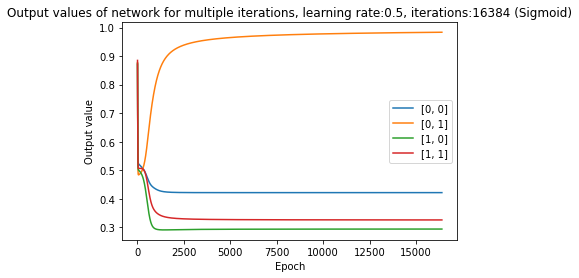

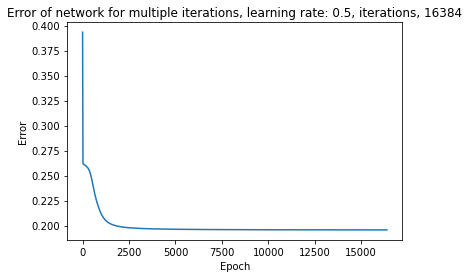

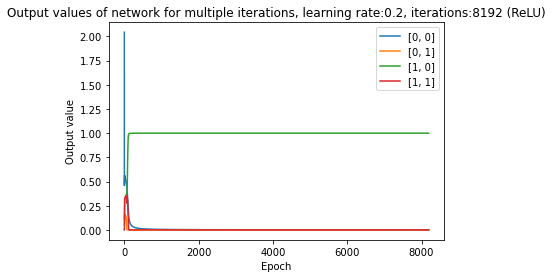

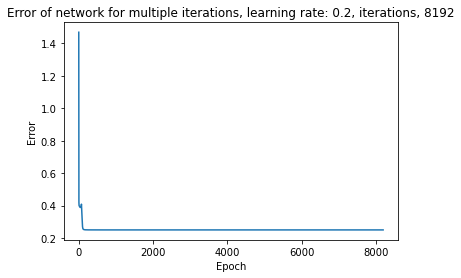

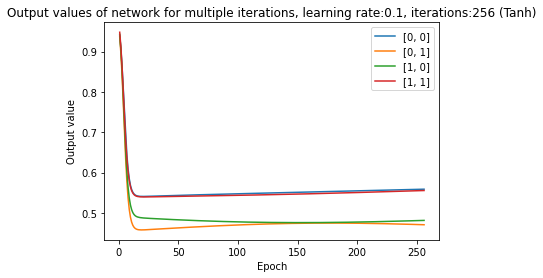

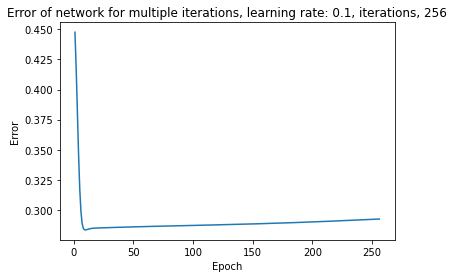

0.2593386022394653

In [100]:
input = standardInput
plotGraphs(lr=0.5, iterations=16384, nodeType="Sigmoid", graphs=True)
plotGraphs(lr=0.2, iterations=8192, nodeType="ReLU", graphs=True)
plotGraphs(lr=0.1, iterations=256, nodeType="Tanh", graphs=True)

Now, we will do the same, but using the noisy output.

In [92]:
dfsignoisy = pd.DataFrame(columns=learningRate)
dftanhnoisy = pd.DataFrame(columns=learningRate)
dfrelunoisy = pd.DataFrame(columns=learningRate)

In [93]:
input = noisyInput
output = normalOutput

for lr in learningRate:
    columnsignoisy = []
    columnrelunoisy = []
    columntanhnoisy = []
    
    for iteration in iterations:
        
        errorsig = plotGraphs(lr=lr, iterations=iteration, nodeType="Sigmoid", graphs=False)
        errorrelu = plotGraphs(lr=lr, iterations=iteration, nodeType="ReLU", graphs=False)
        errortanh = plotGraphs(lr=lr, iterations=iteration, nodeType="Tanh", graphs=False)
        
        columnsignoisy.append(errorsig)
        columnrelunoisy.append(errorrelu)
        columntanhnoisy.append(errortanh)
        
    dfsignoisy[lr] = columnsignoisy
    dfrelunoisy[lr] = columnrelunoisy
    dftanhnoisy[lr] = columntanhnoisy
    
dfsignoisy.index = iterations
dfrelunoisy.index = iterations
dftanhnoisy.index = iterations

In [94]:
dfsignoisy

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,0.251823,0.252447,0.251254,0.251033,0.250513,0.249130,0.250763,0.247014,0.249324,0.251119
256,0.252568,0.250783,0.250471,0.249930,0.248832,0.250542,0.248583,0.231104,0.250451,0.214722
512,0.251136,0.249878,0.250039,0.246097,0.230632,0.239274,0.216639,0.195016,0.204801,0.246545
1024,0.248840,0.248868,0.229159,0.233054,0.189778,0.167007,0.213521,0.183447,0.129330,0.148427
2048,0.246134,0.227703,0.216983,0.148008,0.120109,0.165317,0.131017,0.050551,0.054965,0.043643
4096,0.215577,0.141446,0.120510,0.047056,0.058878,0.022958,0.017553,0.020427,0.013971,0.011101
8192,0.185439,0.087434,0.029619,0.020640,0.174328,0.007882,0.005448,0.004584,0.171049,0.018597
16384,0.072142,0.175725,0.007710,0.004514,0.003095,0.002541,0.002009,0.001712,0.001434,0.001243


In [95]:
dfrelunoisy

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,0.263800,0.2511,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
256,0.258146,0.5000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
512,0.250640,0.5000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1024,0.250190,0.5000,0.500001,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2048,0.250015,0.5000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4096,0.250001,0.5000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
8192,0.250000,0.5000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5
16384,0.250000,0.5000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [96]:
dftanhnoisy

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,0.257548,0.258328,0.254223,0.255366,0.265702,0.279064,0.292618,0.300278,0.293043,0.263422
256,0.257464,0.254850,0.269543,0.256426,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422
512,0.255573,0.249037,0.251499,0.256565,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422
1024,0.249435,0.248910,0.251932,0.256566,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422
2048,0.247523,0.250041,0.251932,0.256566,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422
4096,0.248776,0.250341,0.251932,0.256566,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422
8192,0.248943,0.250333,0.251932,0.256566,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422
16384,0.248943,0.250333,0.251932,0.256566,0.265802,0.279064,0.292618,0.300278,0.293043,0.263422


Just like previously, we will create a graph of the best performing networks with the noisy data.

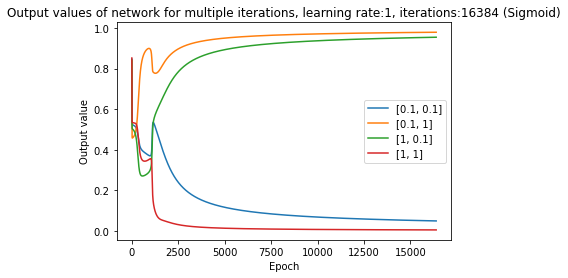

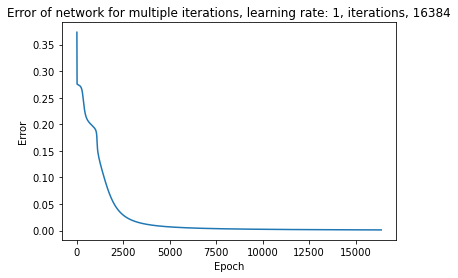

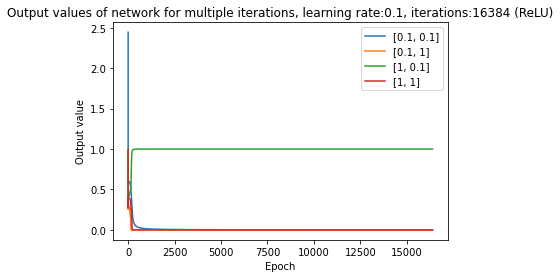

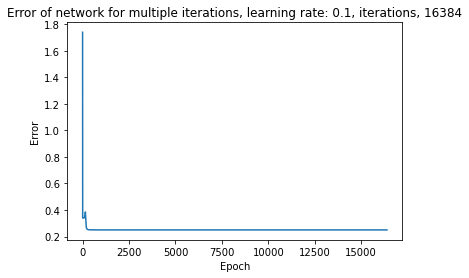

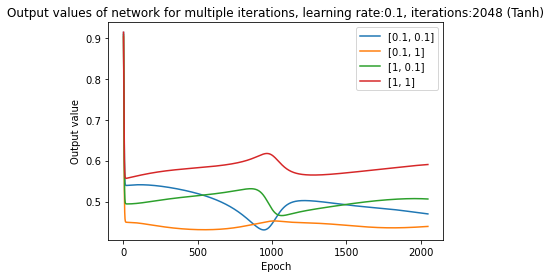

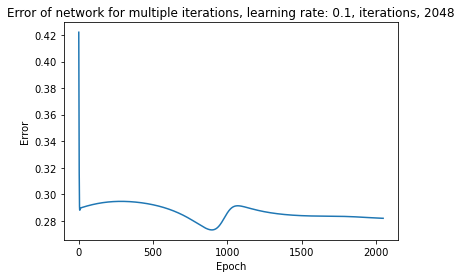

0.24757238298321307

In [101]:
input = noisyInput
plotGraphs(lr=1, iterations=16384, nodeType="Sigmoid", graphs=True)
plotGraphs(lr=0.1, iterations=16384, nodeType="ReLU", graphs=True)
plotGraphs(lr=0.1, iterations=2048, nodeType="Tanh", graphs=True)

From these results, we can see that the sigmoid model converges. To try and get the tanh network to do the same, we add noise in the data by changing part of the input to -1 in stead of 1.

In [102]:
input = negativeInput
dftanhneg = pd.DataFrame(columns=learningRate)

for lr in learningRate:
    columntanhneg = []
    for iteration in iterations:
        errortanhneg = plotGraphs(lr=lr, iterations=iteration, nodeType="Tanh", graphs=False)
        columntanhneg.append(errortanhneg)
    dftanhneg[lr] = columntanhneg
dftanhneg.index = iterations

dftanhneg

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
128,1.933355e-03,2.836887e-05,1.246751e-05,7.144486e-07,2.597548e-03,0.202816,0.203239,0.200135,0.016082,0.192708
256,3.138435e-05,2.629850e-06,7.751075e-07,4.320604e-07,2.401225e-03,0.005959,0.015375,0.200135,0.195143,0.192707
512,2.444501e-06,5.917316e-07,2.486443e-07,1.293082e-07,2.006068e-01,0.202814,0.203237,0.200135,0.021746,0.192707
1024,5.784007e-07,8.374790e-06,3.859770e-04,3.893669e-08,1.795342e-08,0.006290,0.203237,0.200135,0.024499,0.194639
2048,1.148399e-07,3.289347e-08,1.616375e-03,1.071713e-08,4.092044e-03,0.017300,0.010377,0.200135,0.195143,0.192707
4096,2.802969e-08,3.028805e-08,1.244980e-08,1.437452e-04,1.132768e-03,0.007899,0.023567,0.200135,0.017563,0.023262
8192,6.835783e-09,1.862188e-09,6.594797e-05,8.754219e-05,3.204255e-03,0.007899,0.010832,0.033922,0.022937,0.648534
16384,2.209793e-09,1.737185e-03,3.363531e-05,6.647111e-05,7.517298e-03,0.203046,0.010320,0.015796,0.425563,0.194639


From this table, we can see that now the tanh model also converges. The best version is plotted below. The graph shows that the tanh function keeps fluctuating rapidly, and doesn't stabilize as much as the sigmoid model.

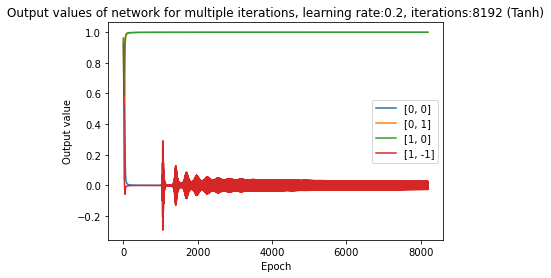

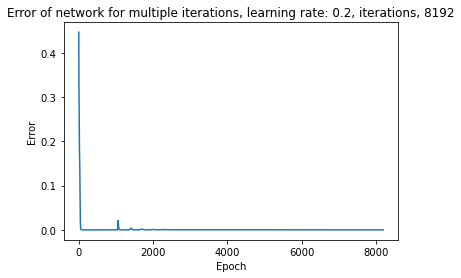

0.00017720708872694628

In [103]:
input = negativeInput
plotGraphs(lr=0.2, iterations=8192, nodeType="Tanh", graphs=True)